<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **MÃ³dulo** | AnÃ¡lise de Dados: VisualizaÃ§Ã£o de Dados II
Caderno de **ExercÃ­cios**<br> 
Professor [AndrÃ© Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **TÃ³picos**

<ol type="1">
  <li>DistribuiÃ§Ãµes: Histograma, KDE e Box Plot;</li>
  <li>CorrelaÃ§Ã£o: GrÃ¡fico de DisperÃ§Ã£o e Mapa de Calor.</li>
</ol>

---

# **ExercÃ­cios**

Nestes exercÃ­cios, vocÃª deve decidir qual Ã© o grÃ¡fico visto em aula que melhor visualiza uma base de dados. ApÃ³s decidir, vocÃª deverÃ¡ criar a visualizaÃ§Ã£o usando o conteÃºdo exposto durante a aula e adicionar um pequeno parÃ¡grafo sobre um insights que pode ser extraido do grÃ¡fico.

## 1\. PreÃ§os `outliers` de diamante

In [ ]:
import seaborn as sns

data = sns.load_dataset("diamonds")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


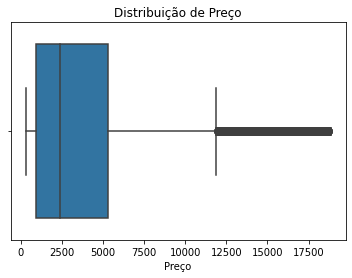

In [ ]:
from matplotlib.pyplot import title
# grÃ¡fico do exercÃ­cio 1

grafico = sns.boxplot(x=data["price"])
grafico.set(title='DistribuiÃ§Ã£o de PreÃ§o', xlabel='PreÃ§o');

**Insight do grÃ¡fico 1**:Utilizando a visualizaÃ§Ã£o acima podemos identificar que 25% dos preÃ§os sÃ£o de atÃ© 2500, e que 75% sÃ£o de 2501 atÃ© 5000 e mÃ¡ximas estÃ£o entre 12.500 a 17.500.

---

## 2\. CorrelaÃ§Ã£o entre o do preÃ§o do diamante com seu peso (`carat`) agrupados por sua transparÃªcia (`clarity`)

In [13]:
import seaborn as sns

data = sns.load_dataset("diamonds")
data.query("price>16000")

,carat,cut,color,clarity,depth,table,price,x,y,z
26458,2.01,Good,I,VS2,63.6,57.0,16003,7.87,7.95,5.03
26459,2.25,Premium,J,SI1,61.8,61.0,16004,8.46,8.39,5.21
26460,2.01,Good,F,SI2,62.9,58.0,16013,7.89,8.01,5.00
26461,2.02,Ideal,I,VS2,61.5,58.0,16018,8.19,8.11,5.01
26462,2.37,Premium,H,SI2,62.3,57.0,16021,8.55,8.50,5.31
...,...,...,...,...,...,...,...,...,...,...
27745,2.00,Very Good,H,SI1,62.8,57.0,18803,7.95,8.00,5.01
27746,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11
27747,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56
27748,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04


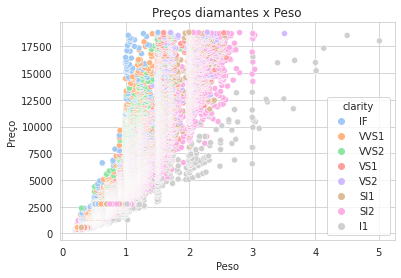

In [17]:
# grÃ¡fico do exercÃ­cio 2

diamonds = data[['price','carat','clarity']]

with sns.axes_style('whitegrid'):
  graf_preco = sns.scatterplot(data=diamonds,x='carat',y='price',hue='clarity',palette='pastel')
  graf_preco.set(title='PreÃ§os diamantes x Peso',xlabel='Peso',ylabel='PreÃ§o');

**Insight do grÃ¡fico 2**: Assim uma correlaÃ§Ã£o entre preÃ§o e peso, podemos concluir que quanto mais pesado for o diamente mais caro serÃ¡

---

## 3\. DistribuiÃ§Ã£o contÃ­nua aproximada do peso (`weight`) de carros

In [ ]:
import seaborn as sns

data = sns.load_dataset("mpg")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


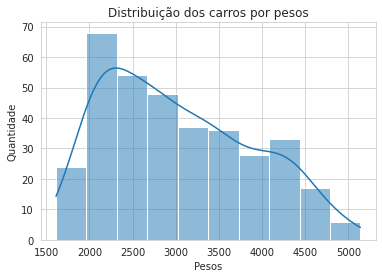

In [ ]:
# grÃ¡fico do exercÃ­cio 3
cars = data[['name','weight']]

cars_peso = cars.groupby('weight').agg('sum')

distribuiÃ§Ã£o = cars_peso.sort_values(by=['weight'],ascending=False)

with sns.axes_style('whitegrid'):
  grafico = sns.histplot(data=distribuiÃ§Ã£o,x="weight",kde=True,palette="pastel")
  grafico.set(title='DistribuiÃ§Ã£o dos carros por pesos',xlabel='Pesos',ylabel='Quantidade')

#distribuiÃ§Ã£o

**Insight do grÃ¡fico 3**: Analisando a distribuiÃ§Ã£o, conseguimos chegar Ã  conclusÃ£o que boa parte dos veÃ­culos pesam entre 2000 e 3000 na primeira fatia, a segunda fica entre 4000 e 5000.

---